# step 1  Pick a dataset and Import packages 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

## read Boston Airbnb datasets

In [2]:

_listings_raw = pd.read_csv('listings.csv', index_col = "id")

_listings = _listings_raw.copy()

# step 2 : three questions
### we answering following questions:

In [3]:
#What Features are affecting the price most? name the features that affect the price most.
#Can we predict the price of a listing in Boston AirBnB?
#What is the highest proportion in each cancellation_policy category ?
#What is the highest proportion in each review_scores_rating category ?

# step 3:  Prepare data

### Exploring dataset

In [4]:
print(_listings.shape)




(3585, 94)


The Boston Airbnb listings dataset has 3585 rows and 94 columns.

In [5]:
print(_listings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 12147973 to 14504422
Data columns (total 94 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_url                       3585 non-null   object 
 1   scrape_id                         3585 non-null   int64  
 2   last_scraped                      3585 non-null   object 
 3   name                              3585 non-null   object 
 4   summary                           3442 non-null   object 
 5   space                             2528 non-null   object 
 6   description                       3585 non-null   object 
 7   experiences_offered               3585 non-null   object 
 8   neighborhood_overview             2170 non-null   object 
 9   notes                             1610 non-null   object 
 10  transit                           2295 non-null   object 
 11  access                            2096 non-null   object 


Some columns have very few non-null values,
There are columns are not useful ,
There are columns are of type object.


In [6]:
_listings

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


### Data cleaning and transformations¶


In [7]:
def clean_listing_dataset ():
    # step 1: remove columns from the data set that are not useful for price prediction
    # step 2: remove columns that has very high percentage of na values
    # step 3: transform price and other numeric columns from string to int,float type 
    _cols_to_drop = ['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'picture_url', 
             'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 
             'city','state','country','country_code','market','requires_license',
            'experiences_offered','first_review', 'last_review','calendar_last_scraped',
       'calendar_updated', 'scrape_id', 'last_scraped', 'space', 'host_neighbourhood', 
        'neighborhood_overview', 'host_listings_count', 'zipcode', 'is_location_exact', 'host_location',
       'host_total_listings_count', 'neighbourhood','smart_location','host_id']
    # droping columns that are not useful
    _listings.drop(_cols_to_drop, axis=1, inplace=True)
    # droping columns having no values or less than thres
    _thresh = len(_listings) * .35
    _listings.dropna(axis=1, thresh=_thresh, inplace = True)
    # remove $ and comma from price cols, convert it to float and fill na values by mean/median
    for _price_fe in ["cleaning_fee", "security_deposit", "price", "extra_people"]:
        # remove $ and comma from price, ignore na values so that we wont get any errors.
        _listings[_price_fe] = _listings[_price_fe].map(lambda p : p.replace('$','').replace(',',''), na_action='ignore')
        # convert cols to float type
        _listings[_price_fe] = _listings[_price_fe].astype(float)
        # fill na values with mean/median
        _listings[_price_fe].fillna(_listings[_price_fe].median(), inplace=True)
    # remove % from rate cols and convert it to int
    for _rate in ['host_response_rate', 'host_acceptance_rate']:
        # replace % with blank
        _listings[_rate] = _listings[_rate].map(lambda r: r.replace('%',''), na_action='ignore')
        # fill na values with backfill or ffill
        _listings[_rate].fillna(method="backfill", inplace=True)
        # convert to int type
        _listings[_rate] = _listings[_rate].astype(int)
    _listings['host_response_time'].fillna(method="backfill", inplace=True)
   # drop rows having na of ["bathrooms", "bedrooms", "beds"] since they are less in number we can not put any assumption and add bias
_listings.dropna(axis=0, subset=["bathrooms", "bedrooms", "beds"], inplace=True)
    # convert ["bathrooms", "bedrooms", "beds"] into int as they make more sense
for _room in ["bathrooms", "bedrooms", "beds"]:
        _listings[_room] = _listings[_room].astype(int)
for _review in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                    "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                    "review_scores_value", "reviews_per_month"]:

    _listings[_review].fillna(_listings[_review].mean(), inplace=True)
    print('data set after cleaning ::')
    print(_listings.info())
    
clean_listing_dataset()   

data set after cleaning ::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 12147973 to 14504422
Data columns (total 94 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_url                       3557 non-null   object 
 1   scrape_id                         3557 non-null   int64  
 2   last_scraped                      3557 non-null   object 
 3   name                              3557 non-null   object 
 4   summary                           3431 non-null   object 
 5   space                             2503 non-null   object 
 6   description                       3557 non-null   object 
 7   experiences_offered               3557 non-null   object 
 8   neighborhood_overview             2162 non-null   object 
 9   notes                             1604 non-null   object 
 10  transit                           2287 non-null   object 
 11  access                         

drop columns that are not useful, drop columns having fewer values, fill na values and converting some object type columns to numeric columns.

### Numerical features analysis


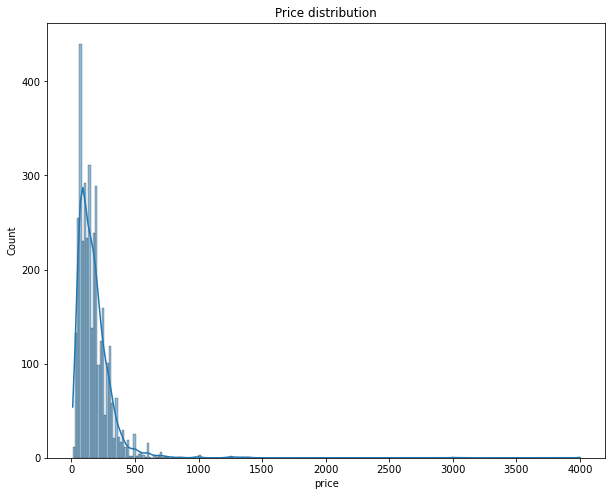

count    3557.000000
mean      174.136351
std       148.710580
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


In [8]:
plt.figure(figsize=(10,8))
plt.title('Price distribution')
sns.histplot(_listings['price'], kde=True, fill=True)
plt.show()

print(_listings['price'].describe())

 price is distributed

### remove outliers

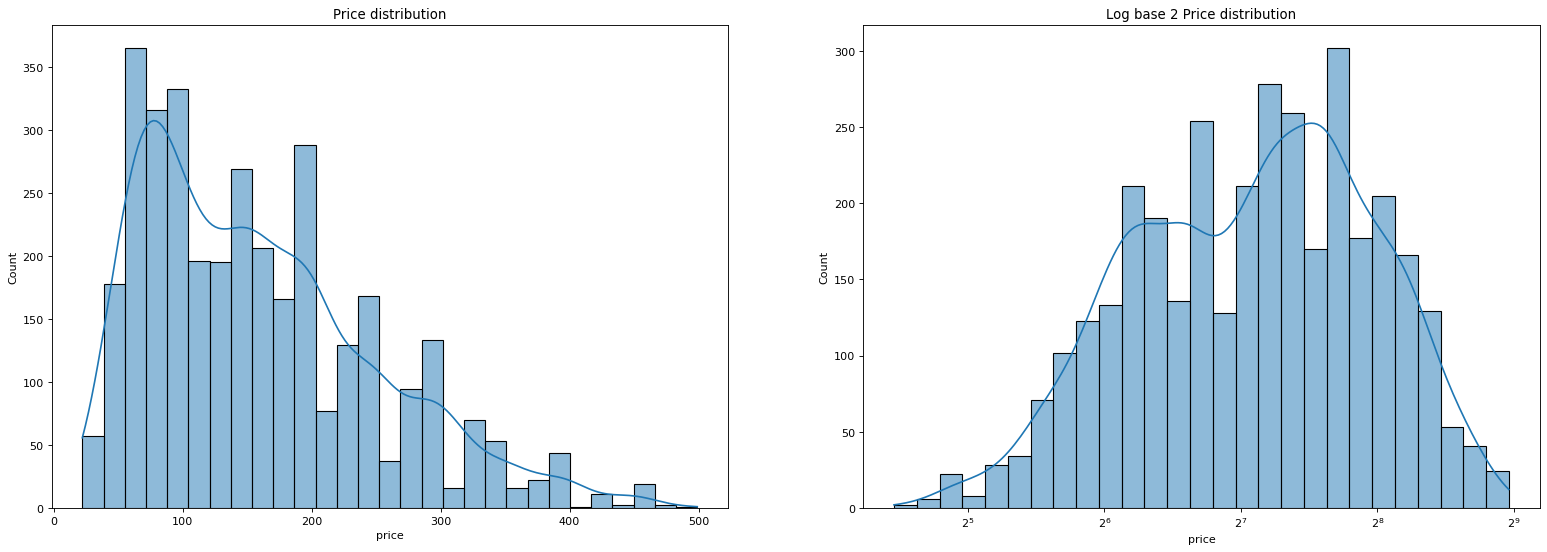

count    3557.000000
mean      174.136351
std       148.710580
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


In [9]:

_listings_new = _listings[(_listings['price'] > 20) & (_listings['price'] < 500)]

fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Price distribution')
axs[1].set_title('Log base 2 Price distribution')
sns.histplot(_listings_new['price'], kde=True, ax=axs[0])
sns.histplot(_listings_new['price'].astype(int), kde=True, log_scale=2, ax=axs[1])
plt.show()

print(_listings['price'].describe())

### Correlation Matrix of all Numerical columns

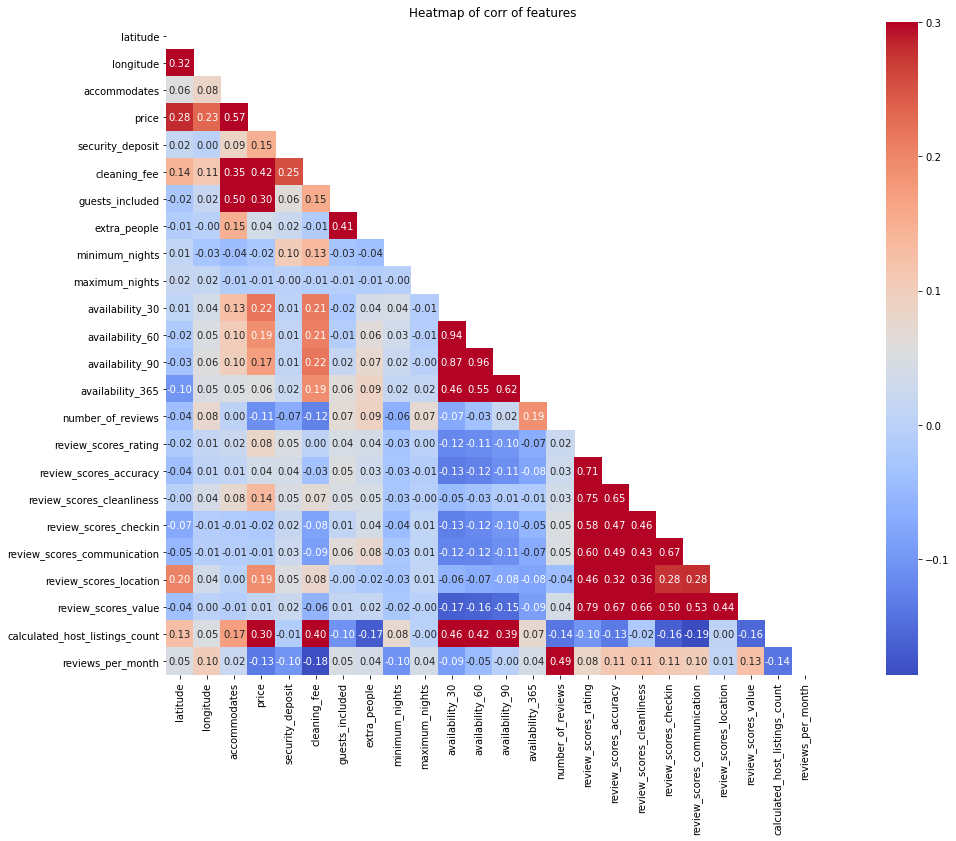

In [10]:
_corr = _listings_new.select_dtypes(include=['int64', 'float64']).corr()
_mask = np.zeros_like(_corr)
_mask[np.triu_indices_from(_mask)] = True
plt.figure(figsize=(24,12))
plt.title('Heatmap of corr of features')
sns.heatmap(_corr, mask = _mask, vmax=.3, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

We can see that cleaning_fee, guests_included, security_deposit, beds, bedrooms, bathrooms, accommodates, longitude, latitude, etc are having a strong relationship with price. We must select these columns for our model.
Surprisingly the number of reviews and reviews per month has a negative relationship with price. We can omit such features.

### Categorical Features Analysis

In [11]:
_listings_new.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463 entries, 12147973 to 14504422
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   name                              3463 non-null   object
 1   summary                           3339 non-null   object
 2   description                       3463 non-null   object
 3   notes                             1566 non-null   object
 4   transit                           2229 non-null   object
 5   access                            2033 non-null   object
 6   interaction                       1973 non-null   object
 7   house_rules                       2315 non-null   object
 8   host_name                         3463 non-null   object
 9   host_since                        3463 non-null   object
 10  host_about                        2199 non-null   object
 11  host_response_time                3463 non-null   object
 12  host_is_s

In [12]:
_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463 entries, 12147973 to 14504422
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              3463 non-null   object 
 1   summary                           3339 non-null   object 
 2   description                       3463 non-null   object 
 3   notes                             1566 non-null   object 
 4   transit                           2229 non-null   object 
 5   access                            2033 non-null   object 
 6   interaction                       1973 non-null   object 
 7   house_rules                       2315 non-null   object 
 8   host_name                         3463 non-null   object 
 9   host_since                        3463 non-null   object 
 10  host_about                        2199 non-null   object 
 11  host_response_time                3463 non-null   object 


### Data preparation for model

In [13]:
# select numeric cols
_num_cols = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'security_deposit', 
             'cleaning_fee', 'guests_included', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']

_numeric = _listings_new.select_dtypes(include=['int32','int64' ,'float64'])[_num_cols]
print(_numeric.info())

# transform categorical columns into numeric and prepare new data frame
_cat_cols = ['host_response_time', 'host_is_superhost', 'room_type', 'bed_type', 'neighbourhood_cleansed',
             'cancellation_policy', 'property_type', 'host_identity_verified', 'instant_bookable',
            'host_has_profile_pic', 'require_guest_profile_picture', 'require_guest_phone_verification']

_numeric[_cat_cols] = _listings_new[_cat_cols]

_num_copy = _numeric.copy()

_num_copy = _num_copy.replace({ "host_is_superhost": {"t": 1, "f": 2}, "instant_bookable": {"t": 1, "f": 2}, 
                                "host_identity_verified": {"t": 1, "f": 2}, "require_guest_profile_picture": {"t": 1, "f": 2},
                                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}, "host_has_profile_pic": {"t": 1, "f": 2},
                               "bed_type": {"Real Bed": 1, "Futon": 2, "Airbed": 3, "Pull-out Sofa": 4, "Couch": 5},
                               "require_guest_phone_verification": {"t": 1, "f": 2},
                               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}})

_dummies = pd.get_dummies(_num_copy)
print(_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463 entries, 12147973 to 14504422
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3463 non-null   float64
 1   latitude                        3463 non-null   float64
 2   longitude                       3463 non-null   float64
 3   accommodates                    3463 non-null   int64  
 4   bedrooms                        3463 non-null   int32  
 5   bathrooms                       3463 non-null   int32  
 6   beds                            3463 non-null   int32  
 7   security_deposit                3463 non-null   float64
 8   cleaning_fee                    3463 non-null   float64
 9   guests_included                 3463 non-null   int64  
 10  availability_30                 3463 non-null   int64  
 11  availability_60                 3463 non-null   int64  
 12  availability_90        

Prepare final dataset containing selected numerical and categorical features. I will first select numerical columns. Next,  transform the categorical columns into numerical/binary vectors.by data frame and converts categorical columns into binary vector representations which are cool.

to extract input (X) and output (y) features to train and evaluate a model.

No handles with labels found to put in legend.


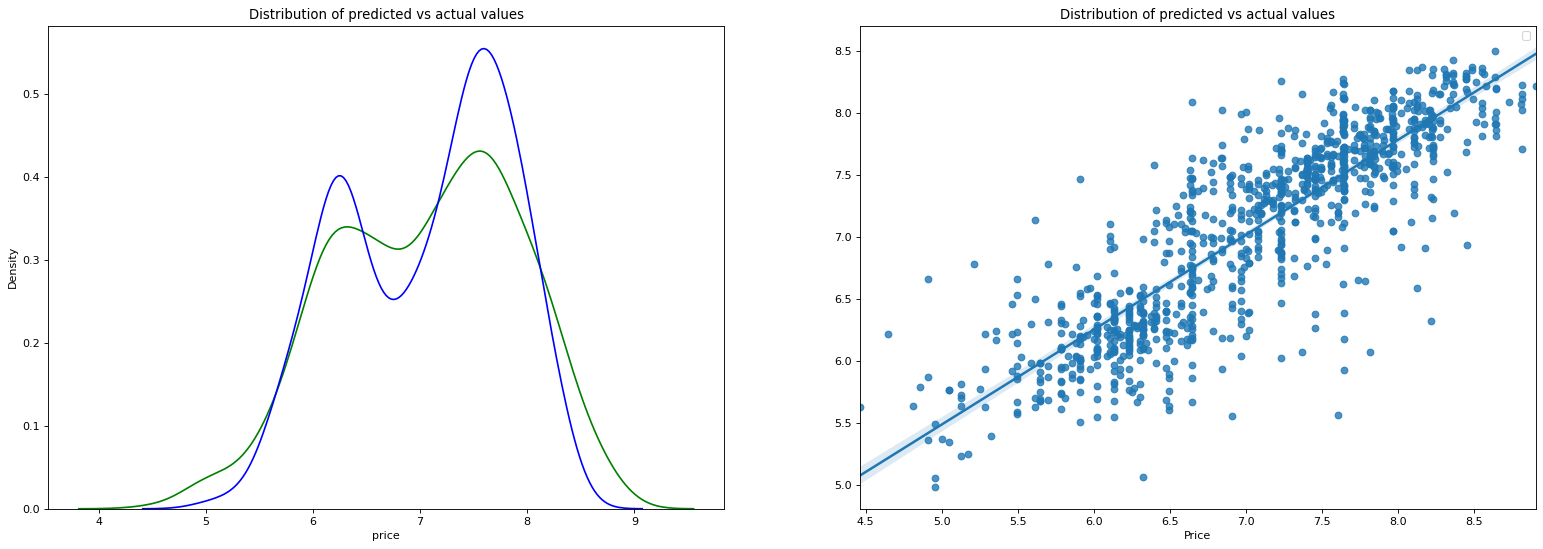

No handles with labels found to put in legend.


Mean absolute error of RandomForestRegressor(n_estimators=76, random_state=47): 0.32111397280050763


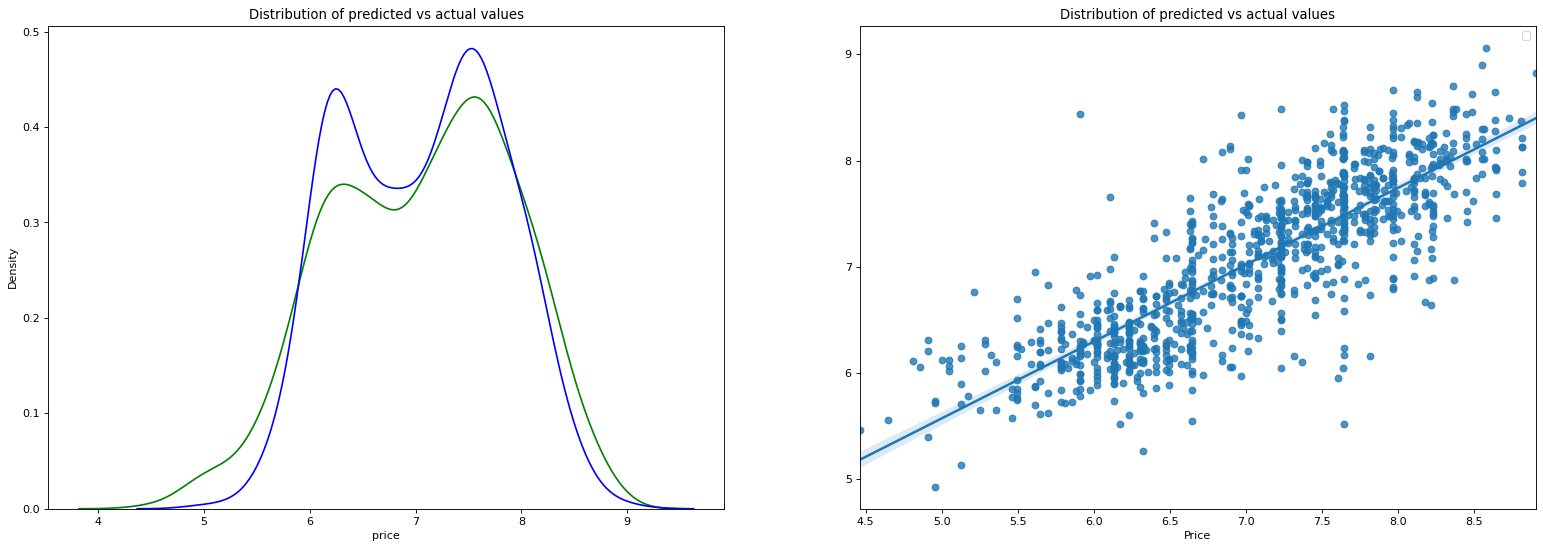

Mean absolute error of LinearRegression(): 0.36734527918327115


In [14]:
# model to predict pricing
y = np.log2(_dummies['price'].astype(int))
X = _dummies.drop('price',  axis =1 )

# split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

def evaluate_model(_model, x_train, y_train, x_test, y_test):
    _model.fit(x_train, y_train)
    _prediction = _model.predict(x_test)
    _mean_abs_err = mean_absolute_error(y_test, _prediction)
    
    fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
    axs[0].set_title('Distribution of predicted vs actual values')
    ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
    ax2 = sns.kdeplot(data=_prediction, color="b", label='Predicted values', ax=ax1)
    
    sns.regplot(x=y_test, y=_prediction)
    plt.title('Distribution of predicted vs actual values')
    plt.xlabel('Price')
    plt.legend()
    plt.show()
    plt.close()
    
    print("Mean absolute error of {0}: {1}".format(_model, _mean_abs_err))

# Create instance of Random Forest Regressor and evaluate model
_model_rf = RandomForestRegressor(n_estimators=76, random_state=47)    
evaluate_model(_model_rf, X_train, y_train, X_test, y_test)

# Create instance of Linear Regressor and evaluate the same
_model_lr = LinearRegression()
evaluate_model(_model_lr, X_train, y_train, X_test, y_test)

 ### What Features are affecting the price most? name the features that affect the price most.



Answer: Based on the study we can see that the following features are affecting the price:

Selected Numerical Features:

price, latitude,longitude, accommodates, bedrooms, bathrooms, beds, security_deposit, cleaning_fee, guests_included, availability_30, availability_60, availability_90, availability_365, review_score_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_location, review-scores_value, calculated_host_listings_count.

Selected Categorical Features:

host_response_time, host_is_superhost, room_type, bed_type, neighbourhood_cleansed, cancellation_policy, property_type, host_identity_verified, instant_bookable, host_has_profile_pic, require_guest_profile_picture, require_guest_phone_verification.

### Can we predict the price of a listing in Boston AirBnB?



Answer: RandomForestRegressor did a better job as compare to LinearRegressor. The absolute mean error for RFR is 0.31 whereas 0.35 for LR.



### What is the highest proportion in each cancellation_policy category ?

In [15]:
status_vals = _listings.cancellation_policy.value_counts()
status_vals

strict             1576
flexible            992
moderate            914
super_strict_30      75
Name: cancellation_policy, dtype: int64

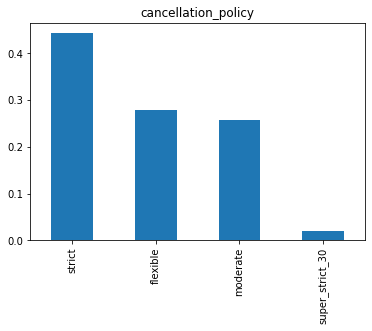

In [16]:
status_vals = _listings.cancellation_policy.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/_listings.shape[0]).plot(kind="bar");
plt.title("cancellation_policy");


Answer: Based on the graph we can see the highest proportion in each cancellation_policy is:strict       


### What is the highest proportion in each review_scores_rating category ?

In [17]:
review_vals = _listings.review_scores_rating.value_counts()
review_vals

91.954562     806
100.000000    626
93.000000     204
96.000000     197
95.000000     171
97.000000     168
90.000000     162
80.000000     160
98.000000     153
94.000000     108
92.000000     103
91.000000      85
87.000000      84
88.000000      67
99.000000      65
89.000000      55
86.000000      46
85.000000      39
84.000000      34
60.000000      33
83.000000      30
70.000000      19
75.000000      16
82.000000      15
73.000000      14
40.000000      11
78.000000      11
79.000000      10
77.000000       9
81.000000       7
76.000000       7
20.000000       6
74.000000       5
64.000000       5
71.000000       4
67.000000       4
50.000000       3
65.000000       3
68.000000       2
47.000000       2
66.000000       2
72.000000       1
46.000000       1
53.000000       1
69.000000       1
55.000000       1
48.000000       1
Name: review_scores_rating, dtype: int64

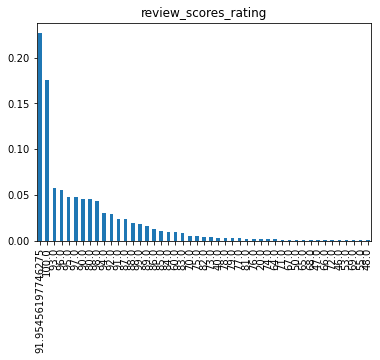

In [18]:
review_vals = _listings.review_scores_rating.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(review_vals/_listings.shape[0]).plot(kind="bar");
plt.title("review_scores_rating");


Answer:Based on the graph we can see the highest proportion in each review_scores_rating is:91.95